In [1]:
from scipy.optimize import curve_fit
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def traduccion(name_img):
     name = str(name_img)+'.tif'
     img = mpimg.imread(name)
     return img, np.dot(img[...,:3], [0.2989, 0.5870, 0.1140])

In [3]:
def acotar(arreglo, centro,dx, filacolumna):

     condicion = []
     for i in range(centro-dx):
          condicion.append(False)
     if dx > 0:
          for i in range(2*dx+1):
               condicion.append(True)
     else:
          condicion.append(True)

     cota = np.compress(condicion, arreglo, axis = filacolumna)
     return cota

def mean(arreglo,centro,dx, filacolumna):
     cota = acotar(arreglo,centro,dx, filacolumna)
     return cota.mean(axis=filacolumna)

def determinar_max(data,centro,dx, filacol):
     rows = mean(data, centro, dx, filacol)

     max = 0
     posicion = 0
     for i in range(len(rows)):
          if rows[i] > max:
               max = rows[i]
               posicion = i
     return posicion


In [4]:
def seccionar_modelar(data, centro, dx, filacol):

     rows = mean(data,centro, dx,filacol)

     seccion = []
     posicion = determinar_max(data,centro,dx,filacol)
     for i in range(81):
          seccion.append(rows[i+(posicion-int(81/2))])

     return seccion

In [10]:
def modelo_sinosoidal(x, i0, A, k, phi):
     return i0 + A * np.sin(k * x + phi)

def ajustar_modelo(lista_acotado):
     xvals = np.zeros(len(lista_acotado))
     for i in range(len(lista_acotado)):
          xvals[i] = i

     popt, pcov = curve_fit(modelo_sinosoidal,xvals, lista_acotado,p0=[12.5, 12,1.25/3 , 3.7])
     return popt[0],popt[1],popt[2],popt[3]

In [11]:
def graficar_realvsmodelo (name_img,centro, dx, filacol):
    img, data = traduccion(name_img)
    seccion =np.array(seccionar_modelar(data,centro, dx,filacol))
    i0, A, k, phi = ajustar_modelo(seccion)

    xvals, y = np.zeros(len(seccion)), np.zeros(len(seccion))
    for i in range(len(seccion)):
          xvals[i] = i
          y[i] = modelo_sinosoidal(xvals[i],i0,A,k,phi)

    plt.plot(seccion, label = 'Mean Intensity Data')
    plt.plot(xvals,y, label = 'Model',linestyle ='dashed')
    plt.xlabel('Number of Pixels')
    plt.ylabel('Intensity')
    plt.legend(loc='upper right')
    plt.title('Piezoeléctrico ' + str(name_img) + 'V Sine Model')
    plt.savefig('Piezo_' + str(name_img) +'V Sine Model'+ '.png')
    plt.show()
    plt.clf()

    print(i0, A, k, phi)

In [13]:
img, data = traduccion('19.38')
data

array([[0.    , 0.9999, 0.    , ..., 0.    , 0.    , 0.9999],
       [0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
       [0.9999, 0.    , 0.    , ..., 0.    , 0.    , 0.9999],
       ...,
       [0.    , 0.    , 0.9999, ..., 0.    , 0.    , 0.    ],
       [0.9999, 0.9999, 0.    , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.9999, 0.    , ..., 0.    , 0.    , 0.    ]])

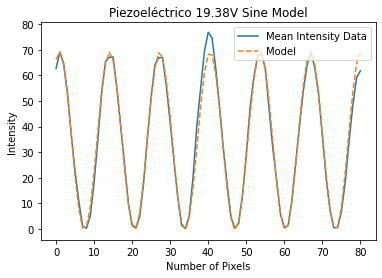

34.381152796583685 34.73068731066609 0.4758093565182941 1.1649808347558988


<Figure size 432x288 with 0 Axes>

In [14]:
graficar_realvsmodelo('19.38',int(716/2),10,1)

In [15]:
collection_piezo = ['0.00', '10.00','15.00', '20.00', '30.01', '40.00','45.01', '50.00', '60.00','74.99']

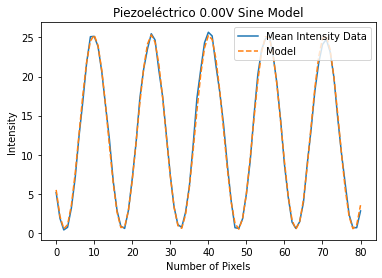

12.890772428697193 12.428321146389207 0.41336681280037957 3.7786716542243193


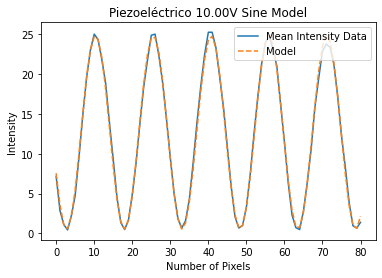

12.69044343025652 12.157598184244542 0.41340229481794893 3.5770953276631703


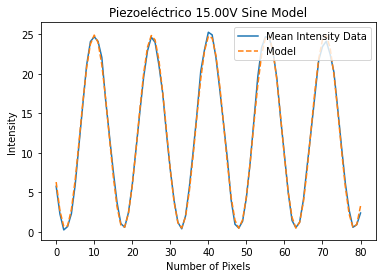

12.687809933731018 12.237847679817698 0.41411916201405186 3.690553303035809


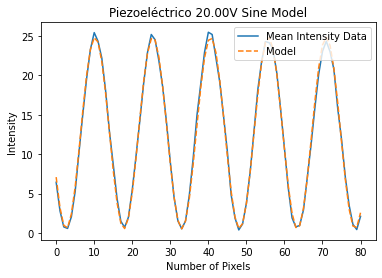

12.680846493651368 12.156623600139401 0.4136965745544901 3.6202959213405173


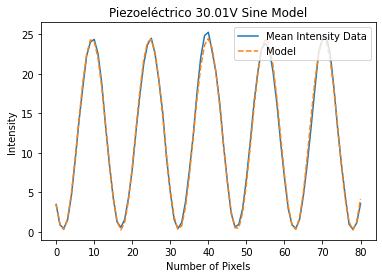

12.369275930052607 12.11479156546473 0.4123732587093161 3.9672867759814165


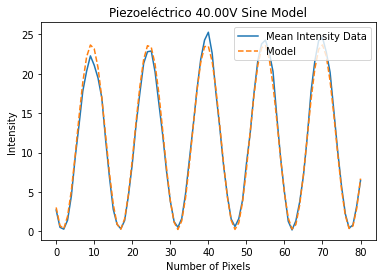

11.98932737310923 11.741091013624665 0.41530049101288696 4.008259422231253


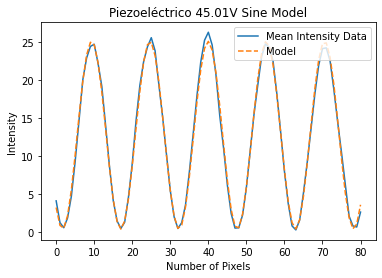

12.744460759631911 12.296814995448884 0.4105242462063939 4.021952167357482


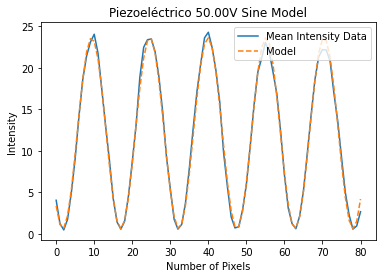

12.121289033010141 11.501819205765294 0.41164269590134084 4.006465634009315


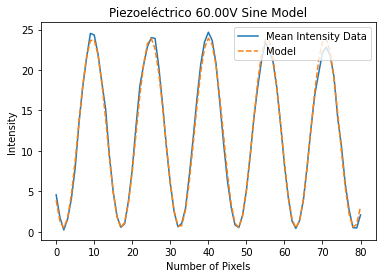

12.208294630303435 11.716604337477547 0.4110148414811686 3.932343296493214


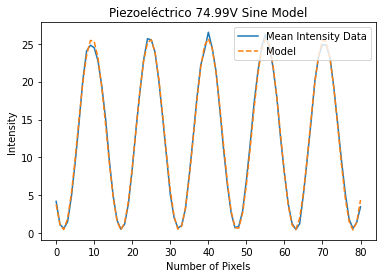

13.032399064126212 12.609486724730388 0.4121926498282489 3.966322669617734


<Figure size 432x288 with 0 Axes>

In [16]:
for i in range(len(collection_piezo)):
    img, data = traduccion(collection_piezo[i])
    rows, cols = data.shape
    graficar_realvsmodelo(collection_piezo[i],int(cols/2),10,1)